In [79]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/
%cd /content/drive/MyDrive/10714
%cd /content/drive/MyDrive/10714/project
!pip3 install pybind11
!sudo apt-get install opencl-headers -y

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive
/content/drive/MyDrive/10714
/content/drive/MyDrive/10714/project
Reading package lists... Done
Building dependency tree       
Reading state information... Done
opencl-headers is already the newest version (2.2~2018.02.21-gb5c3680-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [80]:
import sys
sys.path.append('./python')
import needle as ndl

In [81]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [76]:
def time_binary(f, devices, shape, N):
  results = {str(device): np.empty(N) for device in devices}
  results['numpy'] = np.empty(N)
  for i in range(N):
    a = np.random.randn(*shape)
    b = np.random.randn(*shape)
    t = time.time()
    c = f(a, b)
    results['numpy'][i] = time.time() - t
    for device in devices:
      a_device = ndl.Tensor(a, device=device)
      b_device = ndl.Tensor(b, device=device)
      t = time.time()
      c_device = f(a_device, b_device)
      results[str(device)][i] = time.time() - t
  return results

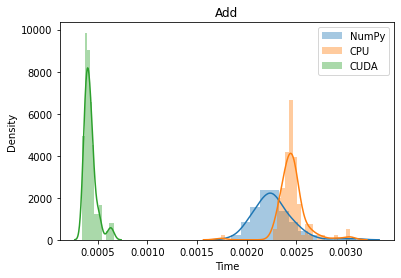

In [77]:
results = time_binary(lambda a, b: a + b, [ndl.cpu(), ndl.cuda()], (1000, 1000), 100)
sns.distplot(results['numpy'], label='NumPy')
sns.distplot(results['cpu(0)'], label='CPU')
sns.distplot(results['cuda(0)'], label='CUDA')
plt.title('Add')
plt.xlabel('Time')
plt.legend();

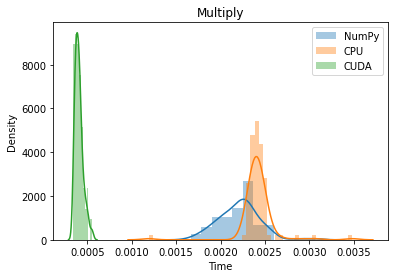

In [78]:
results = time_binary(lambda a, b: a * b, [ndl.cpu(), ndl.cuda()], (1000, 1000), 100)
sns.distplot(results['numpy'], label='NumPy')
sns.distplot(results['cpu(0)'], label='CPU')
sns.distplot(results['cuda(0)'], label='CUDA')
plt.title('Multiply')
plt.xlabel('Time')
plt.legend();